This notebook contains an exploratin of race data in Westlake, Los Angeles for the years 2010 and 2019. This is an initial look into neighborhood change / gentrification indicators. 

A summary:
- I wanted to improve my map which previously was not displaying FIPS with in the tract data but not in the census data. I changed the way I merged the data, by merging so that the missing columns would be filled with "0 values" by using a left join. Is this better? Would 
- I wanted to make a chart that showed a change in racial demographics in Westlake from 2010 to 2019. 

import pandas as pd

import plotly.express as px

import geopandas as gpd

import matplotlib.pyplot as plt

import contextily as ctx

In [2]:
race_2019 = pd.read_csv(
    '2019_race_data.csv',
    dtype=
    {
        'Geo_FIPS':str,

    }
)

Cleaning the data so that I can drop any columns with no values.

In [3]:
race_2019 = race_2019.dropna(axis=1,how="all")

In [4]:
race_2019

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_STATE,Geo_COUNTY,Geo_TRACT,SE_A03001_001,SE_A03001_002,SE_A03001_003,SE_A03001_004,SE_A03001_005,SE_A03001_006,SE_A03001_007,SE_A03001_008
0,06037101110,14000US06037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",ca,140,0,ACSSF,3871,6,37,101110,4283,3347,19,3,331,3,391,189
1,06037101122,14000US06037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",ca,140,0,ACSSF,3872,6,37,101122,3405,2981,74,15,220,0,48,67
2,06037101210,14000US06037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",ca,140,0,ACSSF,3873,6,37,101210,6347,4647,198,0,486,0,921,95
3,06037101220,14000US06037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",ca,140,0,ACSSF,3874,6,37,101220,3702,2634,87,0,341,0,497,143
4,06037101300,14000US06037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",ca,140,0,ACSSF,3875,6,37,101300,3884,3350,205,0,194,0,45,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2341,06037980031,14000US06037980031,Census Tract 9800.31,"Census Tract 9800.31, Los Angeles County, Cali...",ca,140,0,ACSSF,6212,6,37,980031,1175,636,246,37,50,24,98,84
2342,06037980033,14000US06037980033,Census Tract 9800.33,"Census Tract 9800.33, Los Angeles County, Cali...",ca,140,0,ACSSF,6213,6,37,980033,16,0,0,16,0,0,0,0
2343,06037990100,14000US06037990100,Census Tract 9901,"Census Tract 9901, Los Angeles County, California",ca,140,0,ACSSF,6214,6,37,990100,0,0,0,0,0,0,0,0
2344,06037990200,14000US06037990200,Census Tract 9902,"Census Tract 9902, Los Angeles County, California",ca,140,0,ACSSF,6215,6,37,990200,0,0,0,0,0,0,0,0


Keeping only columns that have race data, and FIPS.

In [5]:
columns_to_keep = [
    'Geo_FIPS',
    'SE_A03001_001',   
    'SE_A03001_002',     
    'SE_A03001_003',    
    'SE_A03001_004',     
    'SE_A03001_005',      
    'SE_A03001_006',     
    'SE_A03001_007',      
    'SE_A03001_008',
]

Created a new variable to represent just race data and FIPS.

In [6]:
race_2019_2 = race_2019[columns_to_keep]

In [7]:
race_2019_2

,Geo_FIPS,SE_A03001_001,SE_A03001_002,SE_A03001_003,SE_A03001_004,SE_A03001_005,SE_A03001_006,SE_A03001_007,SE_A03001_008
0,06037101110,4283,3347,19,3,331,3,391,189
1,06037101122,3405,2981,74,15,220,0,48,67
2,06037101210,6347,4647,198,0,486,0,921,95
3,06037101220,3702,2634,87,0,341,0,497,143
4,06037101300,3884,3350,205,0,194,0,45,90
...,...,...,...,...,...,...,...,...,...
2341,06037980031,1175,636,246,37,50,24,98,84
2342,06037980033,16,0,0,16,0,0,0,0
2343,06037990100,0,0,0,0,0,0,0,0
2344,06037990200,0,0,0,0,0,0,0,0


Labeled columns

In [8]:
race_2019_2.columns = [
    'FIPS',
    'Total Population',
    'White Alone',
    'Black or African American Alone',
    'American Indian and Alaska Native Alone',
    'Asian Alone',
    'Native Hawaiian and Other Pacific Islander Alone',
    'Some Other Race Alone',
    'Two or More Races'
]

In [9]:
tracts=gpd.read_file('Census_Tracts_2020.geojson')

Making a geodataframe with the tract data to import the necessary information to make the maps :) 

<AxesSubplot: >

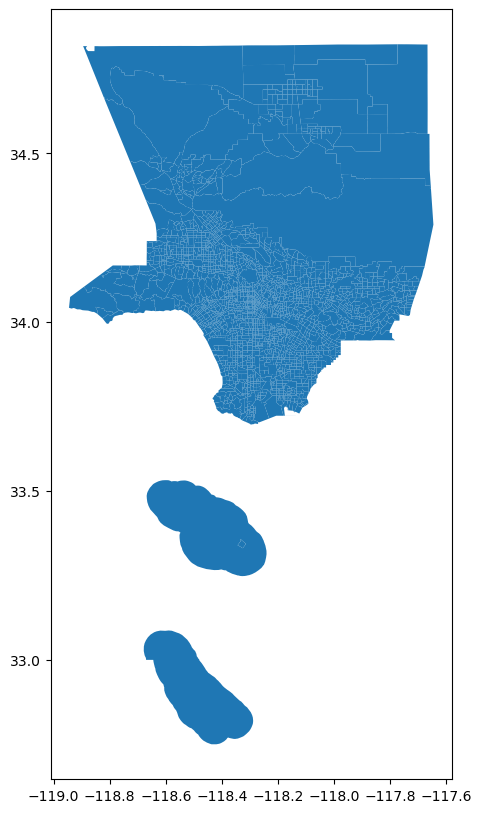

In [10]:
tracts.plot(figsize=(12,10))

Creating a new column called "FIPS" within the tracts dataframe.

In [11]:
tracts['FIPS'] ='06' + '037' + tracts['CT20']

Here I merged the tracts dataframe and the 2019 race data. This is different from the merge I did last week because I merged it "left" rather than "inner". By doing this I am merging the race data onto the tracts data meaning-- if there is a FIP that exists in the tract data that isn't present in the race data, the row in the tract data will still be present in the resulting data frame. This will make the map more full, and detailed. Last week my map had huge blank spots and I couldn't figure out why. This seems to fix that.

In [12]:
tracts_race_2019=tracts.merge(race_2019_2,on="FIPS", how="left")

In [13]:
tracts_race_2019=tracts_race_2019.fillna(0)

Mapping for Black or African American Alone in all of Los Angeles. Map is full, no blank spots!

<AxesSubplot: >

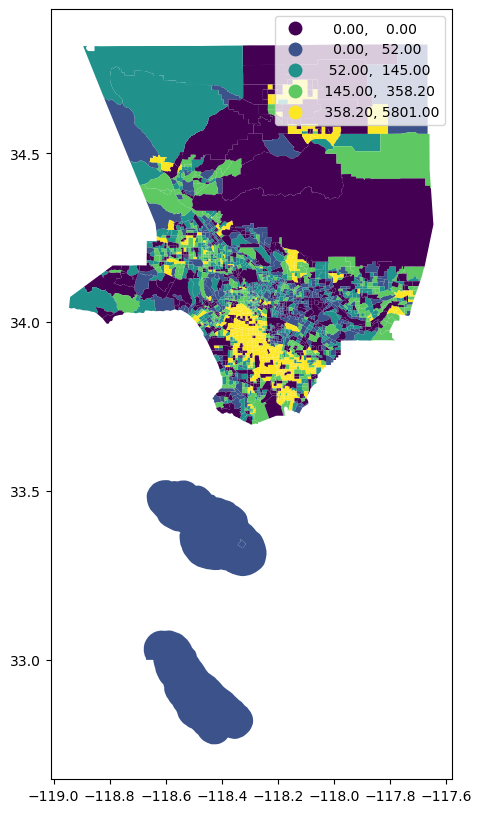

In [14]:
tracts_race_2019.plot(figsize=(12,10),
                 column='Black or African American Alone',
                 legend=True, 
                 scheme='quantiles')

I'm repeating the process I did above but with data from 2010. 

In [15]:
race_2010 = pd.read_csv(
    '2010_race_data.csv',
    dtype=
    {
        'Geo_FIPS':str,

    }
)

In [16]:
race_2010 = race_2010.dropna(axis=1,how="all")

In [17]:
columns_to_keep = [
    'Geo_FIPS',
    'SE_A03001_001',   
    'SE_A03001_002',     
    'SE_A03001_003',    
    'SE_A03001_004',     
    'SE_A03001_005',      
    'SE_A03001_006',     
    'SE_A03001_007',      
    'SE_A03001_008',
]

In [18]:
race_2010_2 = race_2010[columns_to_keep]

In [19]:
race_2010_2.columns = [
    'FIPS',
    'Total Population',
    'White Alone',
    'Black or African American Alone',
    'American Indian and Alaska Native Alone',
    'Asian Alone',
    'Native Hawaiian and Other Pacific Islander Alone',
    'Some Other Race Alone',
    'Two or More Races'
]

In [20]:
tracts_race_2010=tracts.merge(race_2010_2,on="FIPS", how="left")

In [21]:
tracts_race_2010=tracts_race_2010.fillna(0)

<AxesSubplot: >

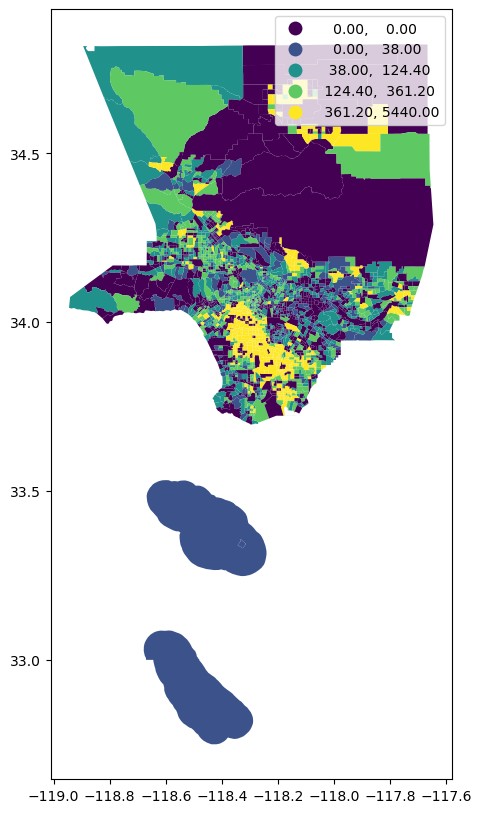

In [22]:
tracts_race_2010.plot(figsize=(12,10),
                 column='Black or African American Alone',
                 legend=True, 
                 scheme='quantiles')

In [23]:
columns_to_keep = [
    'FIPS',
    'Black or African American Alone'
]

Since I only wanted to chart Black of African American Alone, I created a new variable to represent that.

In [24]:
race_2010_3 = race_2010_2[columns_to_keep]
race_2019_3 = race_2019_2[columns_to_keep]

Merging both data sets with FIPS so that they are all in one table. This makes it easier to create the bar plot later on.

In [25]:
merged_race_data = race_2010_3.merge(race_2019_3, on='FIPS')

In [26]:
merged_race_data

,FIPS,Black or African American Alone_x,Black or African American Alone_y
0,06037101110,38,19
1,06037101122,0,74
2,06037101220,23,87
3,06037101300,12,205
4,06037101400,132,17
...,...,...,...
2015,06037980030,0,0
2016,06037980031,179,246
2017,06037980033,0,0
2018,06037990100,0,0


Creating a new variable to represent the Westlake neighborhood by creating a list of all the relevant FIPS.

In [27]:
westlake_fips = [
    '06037206052',
    '06037206201',
    '06037206202',
    '06037206301',
    '06037206302',
    '06037206303',
    '06037207303',
    '06037207304',
    '06037207305',
    '06037207306',
    '06037207307',
    '06037207308',
    '06037207400',
    '06037207501',
    '06037207502',
    '06037207711',
    '06037207712',
    '06037207901',
    '06037207902',
    '06037208001',
    '06037208002',
    '06037208301',
    '06037208302',
    '06037208401',
    '06037208402',
    '06037208501',
    '06037208502',
    '06037208610',
    '06037208620',
    '06037208710',
    '06037208720',
    '06037208801',
    '06037208802',
    '06037208902',
    '06037208903',
    '06037208904',
    '06037209103',
    '06037209104',
    '06037209105',
    '06037209106',
    '06037209201',
    '06037209202',
    '06037209300',
    '06037209401',
    '06037209402',
    '06037209403',
    '06037209510',
    '06037209520',
    '06037209810',
    '06037209820',
    '06037210010',
    '06037224010',
    '06037224200',
    '06037224310',
    '06037224320',
    '06037226002'
]

Creating a new variable that filters to create a new data frame that will contain only rows within westlake_fips.

In [28]:
westlake_race_data = merged_race_data[merged_race_data['FIPS'].isin(westlake_fips)]

I thought I'd create a bar graph just to see what it would look like. Obviously a bit messy and it's not understandable. It's useful if you know which FIP represents which region, but it lacks relevant context. 

<AxesSubplot: xlabel='FIPS'>

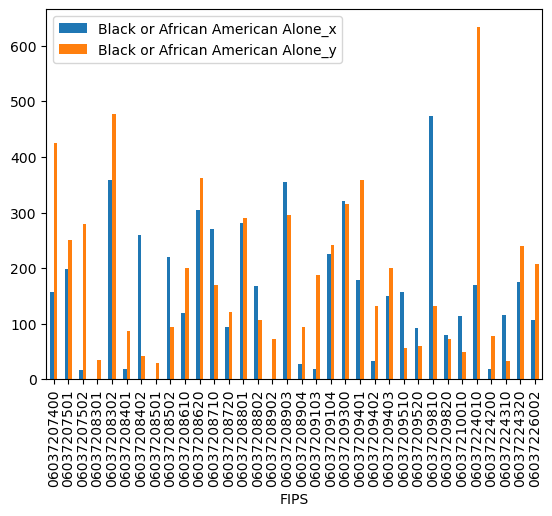

In [29]:
westlake_race_data.plot.bar(x="FIPS")

In [30]:
total_2010 = 0

In [31]:
total_2019 = 0

Looped over the westlake race data to sum up the Black or African American Alone population for 2010 and 2019.

In [32]:
for index, row in westlake_race_data.iterrows():
    total_2010 += row['Black or African American Alone_x']
    total_2019 += row['Black or African American Alone_y']

In [33]:
total_2010

5271

In [34]:
total_2019

6427

Using the total sums from each year I made a custom dataframe which contains to make it easier to plot just data from Westlake.

In [35]:
df = pd.DataFrame([['Westlake', 5271, 6427]], columns= ['Neighborhood','2010','2019'])

<AxesSubplot: xlabel='Neighborhood'>

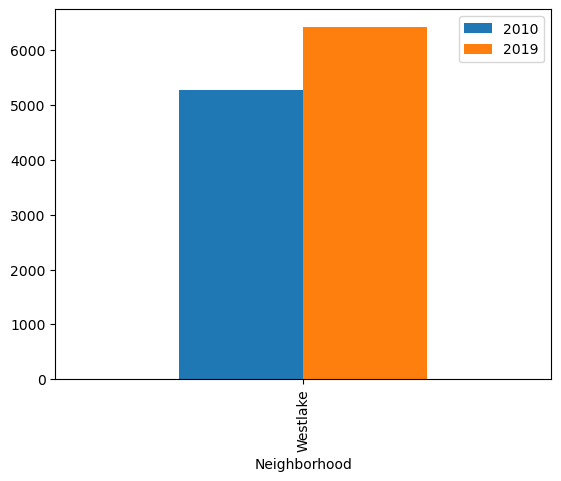

In [36]:
df.plot.bar(x="Neighborhood")